In [5]:
import pytz
from datetime import datetime, timedelta
from gym_mtsim import MtSimulator, OrderType, Timeframe, FOREX_DATA_PATH
import matplotlib.pyplot as plt

selected_symbol = ['EURUSD', 'GBPCAD', 'GBPUSD', 'USDCAD', 'USDCHF', 'GBPJPY', 'USDJPY']
file_name = '1D_train_finall.pkl'

# Create sim
sim = MtSimulator(
    unit='USD',
    balance=10000.,
    leverage=100.,
    stop_out_level=0.2,
    hedge=False,
)

# Load or create new file
if not sim.load_symbols(file_name):
    sim.download_data(
        symbols = selected_symbol,
        time_range=(
            datetime(2017, 1, 1, tzinfo=pytz.UTC),
            datetime(2020, 12, 31, tzinfo=pytz.UTC)
        ),
        timeframe=Timeframe.D1
        #timeframe=Timeframe.D1
    )

# Define df

In [6]:
df = sim.symbols_data

In [7]:
df['EURUSD'].isnull().sum()

Open      0
Close     0
Low       0
High      0
Volume    0
dtype: int64

In [9]:
df['EURUSD'].describe()

,Open,Close,Low,High,Volume
count,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000
mean,1.142646,1.142830,1.139138,1.146705,80150.075217
std,0.045556,0.045578,0.045302,0.045822,38985.398766
min,1.040440,1.040440,1.033990,1.048980,10530.000000
25%,1.110360,1.110420,1.107600,1.114300,52561.000000
50%,1.136580,1.136570,1.133500,1.140560,73006.000000
75%,1.177000,1.177190,1.173070,1.181240,100855.000000
max,1.250730,1.250780,1.244800,1.255540,308719.000000


In [12]:
df['EURUSD'].dtypes

Open      float64
Close     float64
Low       float64
High      float64
Volume      int64
dtype: object

# Change column name to lower case for finTA

In [13]:
for i in selected_symbol:
    df[i] = df[i].rename(columns=str.lower)

df

{'EURUSD':                               open    close      low     high  volume
 Time                                                                 
 2017-01-02 00:00:00+00:00  1.05100  1.04519  1.04480  1.05275   72920
 2017-01-03 00:00:00+00:00  1.04524  1.04044  1.03399  1.04898  139335
 2017-01-04 00:00:00+00:00  1.04044  1.04871  1.03895  1.04996  138590
 2017-01-05 00:00:00+00:00  1.04871  1.06055  1.04804  1.06149  170836
 2017-01-06 00:00:00+00:00  1.06005  1.05235  1.05235  1.06207  146008
 ...                            ...      ...      ...      ...     ...
 2020-12-24 00:00:00+00:00  1.21857  1.21808  1.21774  1.22157   47758
 2020-12-28 00:00:00+00:00  1.21696  1.22160  1.21696  1.22506   65208
 2020-12-29 00:00:00+00:00  1.22160  1.22482  1.22070  1.22749   56037
 2020-12-30 00:00:00+00:00  1.22471  1.22961  1.22470  1.23099   66896
 2020-12-31 00:00:00+00:00  1.22963  1.22155  1.22127  1.23093   58559
 
 [1037 rows x 5 columns],
 'GBPCAD':                             

# Change volume data type to float

In [14]:
for symbol in range(0,len(selected_symbol)):
    #print(type(sim.symbols_data[selected_symbol[symbol]]))
    df[selected_symbol[symbol]]['volume'] = df[selected_symbol[symbol]]['volume'].astype(float)
print(df[selected_symbol[2]].dtypes)

open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object


## Add indicator for each selected_symbol

In [15]:
from finta import TA

moving_average = 15

for symbol in range(0,len(selected_symbol)):
    # Volume
    df[selected_symbol[symbol]]['MFI'] = TA.MFI(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['OBV'] = TA.OBV(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['EFI'] = TA.EFI(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['CFI'] = TA.CFI(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['EMV'] = TA.EMV(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['VPT'] = TA.VPT(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['VWAP'] = TA.VWAP(df[selected_symbol[symbol]])
    
    # Volatility
    df[selected_symbol[symbol]]['ATR'] = TA.ATR(df[selected_symbol[symbol]])
    
    # Trend
    df[selected_symbol[symbol]]['SMA'] = TA.SMA(df[selected_symbol[symbol]], moving_average)
    df[selected_symbol[symbol]]['EMA'] = TA.EMA(df[selected_symbol[symbol]], moving_average)
    df[selected_symbol[symbol]]['WMA'] = TA.WMA(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['ADX'] = TA.ADX(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['TRIX'] = TA.TRIX(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['MI'] = TA.MI(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['CCI'] = TA.CCI(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['SAR'] = TA.SAR(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['STC'] = TA.STC(df[selected_symbol[symbol]])
    
    # Momentum
    df[selected_symbol[symbol]]['RSI'] = TA.RSI(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['STOCHRSI'] = TA.STOCHRSI(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['UO'] = TA.UO(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['STOCH'] = TA.STOCH(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['STOCHD'] = TA.STOCHD(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['WILLIAMS'] = TA.WILLIAMS(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['OBV'] = TA.OBV(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['AO'] = TA.AO(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['KAMA'] = TA.KAMA(df[selected_symbol[symbol]])
    df[selected_symbol[symbol]]['ROC'] = TA.ROC(df[selected_symbol[symbol]])

df[selected_symbol[0]].head()

,open,close,low,high,volume,MFI,OBV,EFI,CFI,EMV,...,STC,RSI,STOCHRSI,UO,STOCH,STOCHD,WILLIAMS,AO,KAMA,ROC
Time,,,,,,,,,,,,,,,,,,,,,
2017-01-02 00:00:00+00:00,1.05100,1.04519,1.04480,1.05275,72920.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 00:00:00+00:00,1.04524,1.04044,1.03399,1.04898,139335.0,NaN,-139335.0,-661.841250,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 00:00:00+00:00,1.04044,1.04871,1.03895,1.04996,138590.0,NaN,-745.0,311.686738,NaN,NaN,...,NaN,65.217146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05 00:00:00+00:00,1.04871,1.06055,1.04804,1.06149,170836.0,NaN,170091.0,971.840782,NaN,NaN,...,NaN,82.656481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06 00:00:00+00:00,1.06005,1.05235,1.05235,1.06207,146008.0,NaN,24083.0,298.534457,NaN,NaN,...,NaN,60.159820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Fill NA

for symbol in range(0,len(selected_symbol)):
    df[selected_symbol[symbol]].fillna(0, inplace=True)

df[selected_symbol[0]].head()

,open,close,low,high,volume,MFI,OBV,EFI,CFI,EMV,...,STC,RSI,STOCHRSI,UO,STOCH,STOCHD,WILLIAMS,AO,KAMA,ROC
Time,,,,,,,,,,,,,,,,,,,,,
2017-01-02 00:00:00+00:00,1.05100,1.04519,1.04480,1.05275,72920.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-03 00:00:00+00:00,1.04524,1.04044,1.03399,1.04898,139335.0,0.0,-139335.0,-661.841250,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-04 00:00:00+00:00,1.04044,1.04871,1.03895,1.04996,138590.0,0.0,-745.0,311.686738,0.0,0.0,...,0.0,65.217146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-05 00:00:00+00:00,1.04871,1.06055,1.04804,1.06149,170836.0,0.0,170091.0,971.840782,0.0,0.0,...,0.0,82.656481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-06 00:00:00+00:00,1.06005,1.05235,1.05235,1.06207,146008.0,0.0,24083.0,298.534457,0.0,0.0,...,0.0,60.159820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
import seaborn as sns
import pandas as pd

volume_list = ['MFI','OBV','EFI','CFI','EMV','VPT','VWAP']
trend_list = ['SMA','EMA','WMA','ADX','TRIX','MI','CCI','SAR','STC']
momentum_list = ['RSI','STOCHRSI','UO','STOCH','STOCHD','WILLIAMS','AO','KAMA','ROC','OBV']

In [18]:
# Volume

for symbol in range(0,len(selected_symbol)):
    print('------')
    print('Corr for', selected_symbol[symbol])
    print('------')
    print(df[selected_symbol[symbol]][volume_list].corr())

------
Corr for EURUSD
------
           MFI       OBV       EFI       CFI       EMV       VPT      VWAP
MFI   1.000000  0.080841  0.400658  0.102112  0.730445  0.088424 -0.030892
OBV   0.080841  1.000000 -0.153433  0.757390 -0.030942  0.972664  0.859153
EFI   0.400658 -0.153433  1.000000 -0.136887  0.526889 -0.084952 -0.312465
CFI   0.102112  0.757390 -0.136887  1.000000 -0.060586  0.782967  0.572322
EMV   0.730445 -0.030942  0.526889 -0.060586  1.000000 -0.002455 -0.165630
VPT   0.088424  0.972664 -0.084952  0.782967 -0.002455  1.000000  0.842853
VWAP -0.030892  0.859153 -0.312465  0.572322 -0.165630  0.842853  1.000000
------
Corr for GBPCAD
------
           MFI       OBV       EFI       CFI       EMV       VPT      VWAP
MFI   1.000000  0.047384  0.574506  0.069632  0.532848  0.099482 -0.074048
OBV   0.047384  1.000000  0.075498  0.718309 -0.001080  0.875460  0.574565
EFI   0.574506  0.075498  1.000000  0.063964  0.495384  0.111141 -0.126218
CFI   0.069632  0.718309  0.063964  1.00

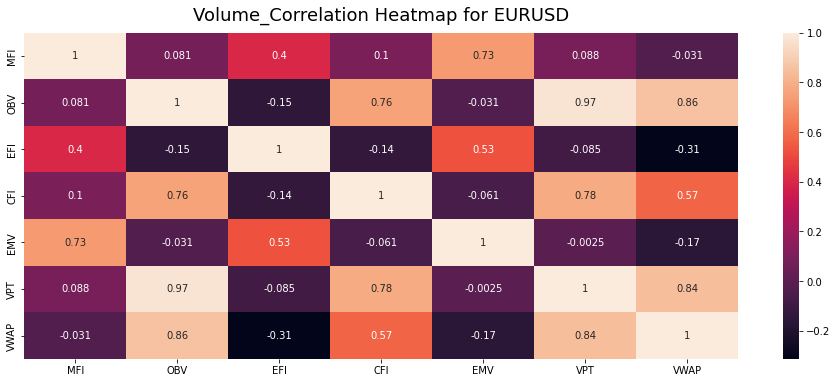

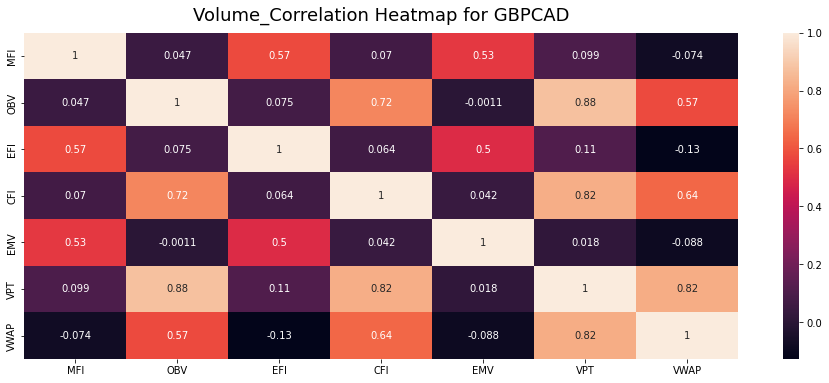

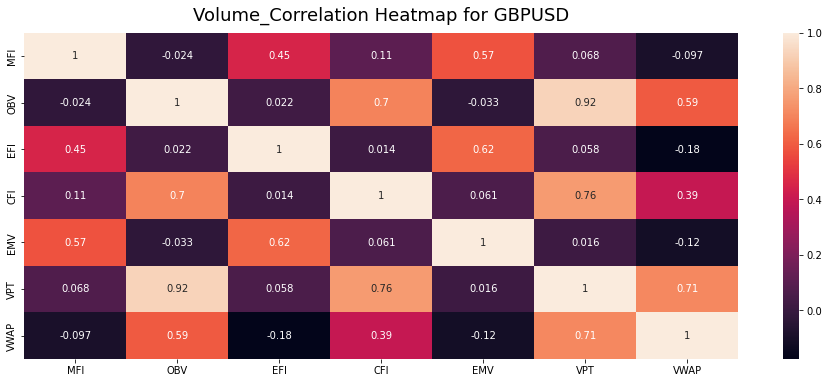

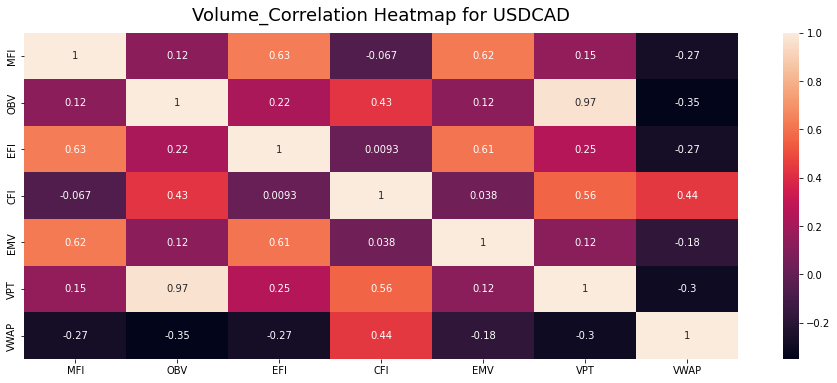

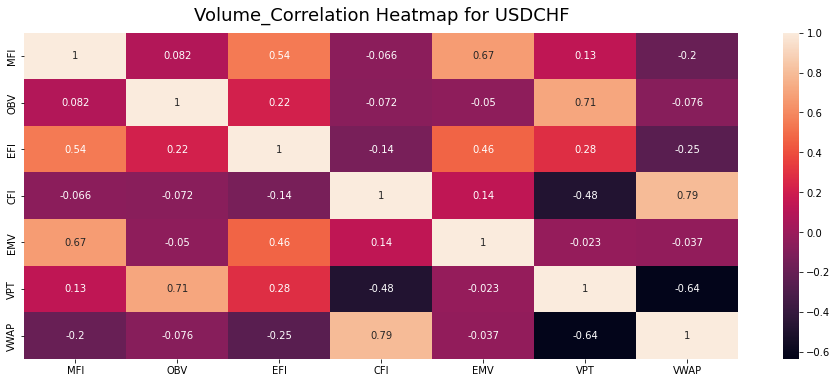

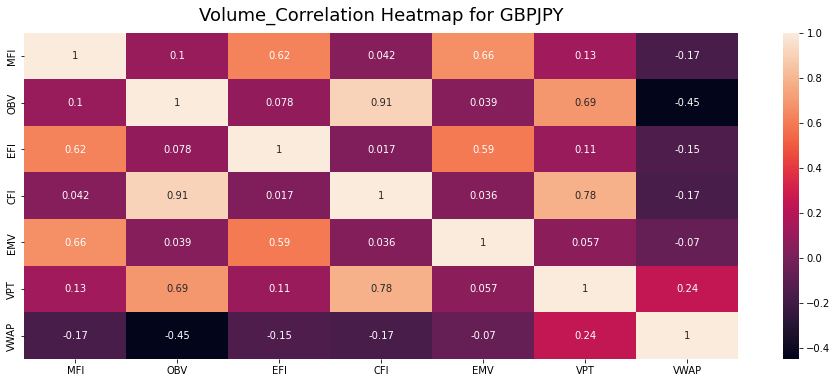

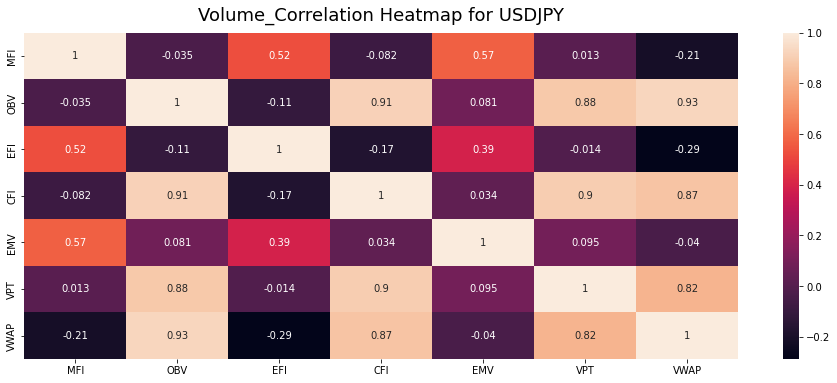

In [19]:
for symbol in range(0,len(selected_symbol)):
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(df[selected_symbol[symbol]][volume_list].corr() ,annot=True)
    heatmap.set_title('Volume_Correlation Heatmap for '+selected_symbol[symbol] , fontdict={'fontsize':18}, pad=12);

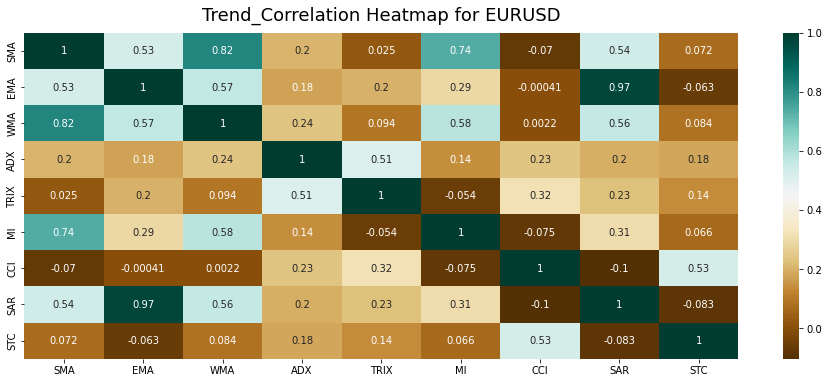

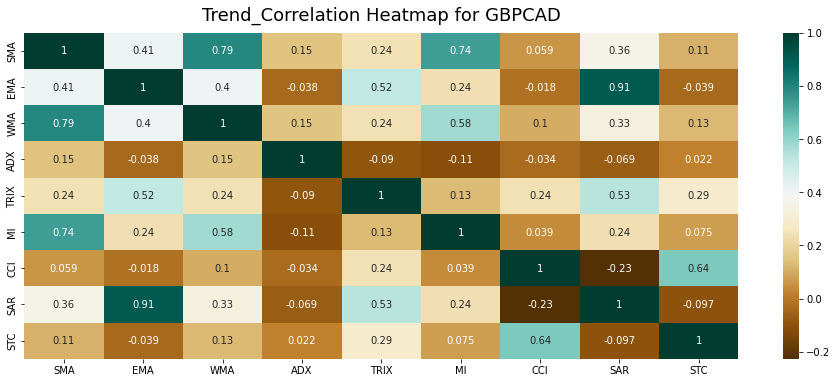

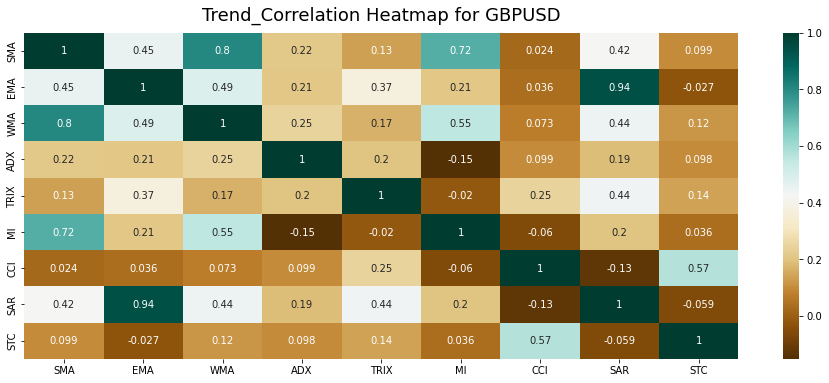

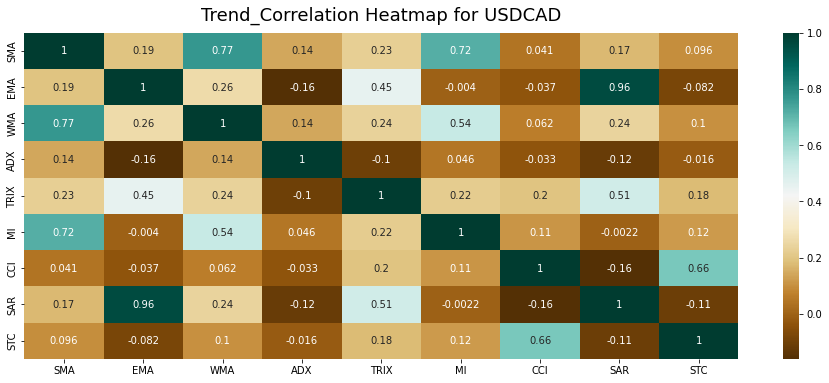

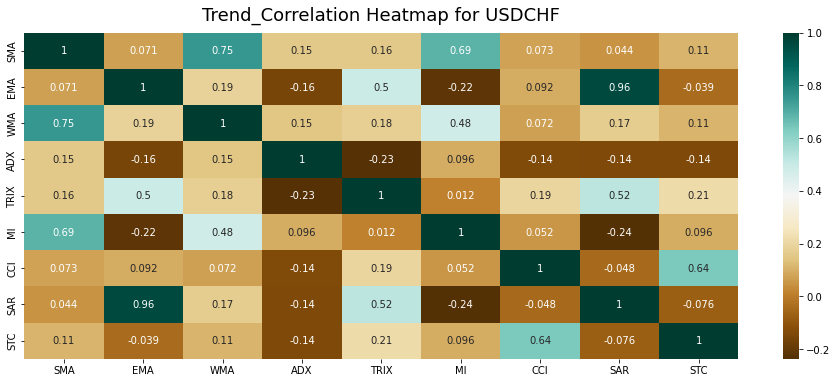

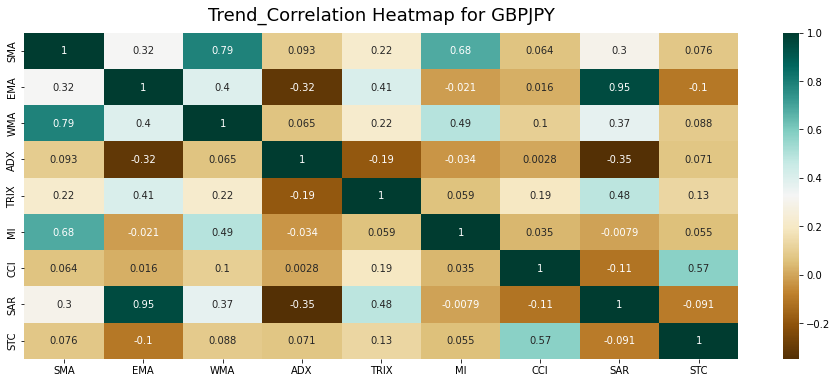

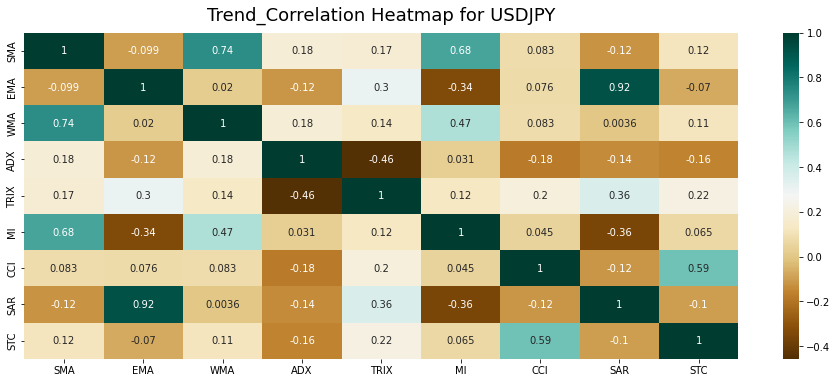

In [20]:
for symbol in range(0,len(selected_symbol)):
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(df[selected_symbol[symbol]][trend_list].corr(), cmap='BrBG', annot=True)
    heatmap.set_title('Trend_Correlation Heatmap for '+selected_symbol[symbol] , fontdict={'fontsize':18}, pad=12);

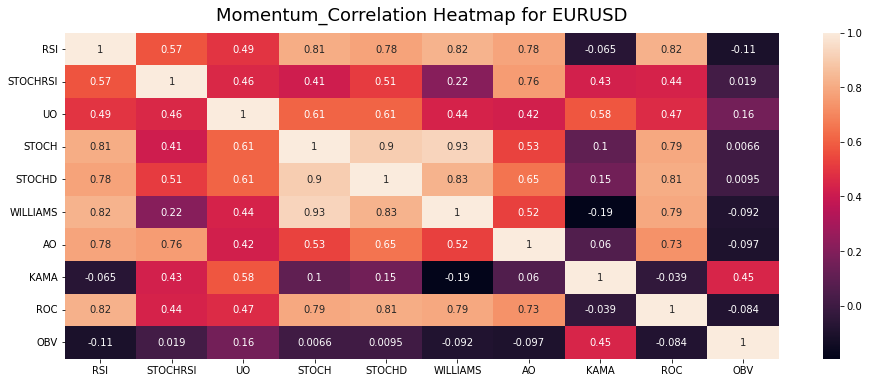

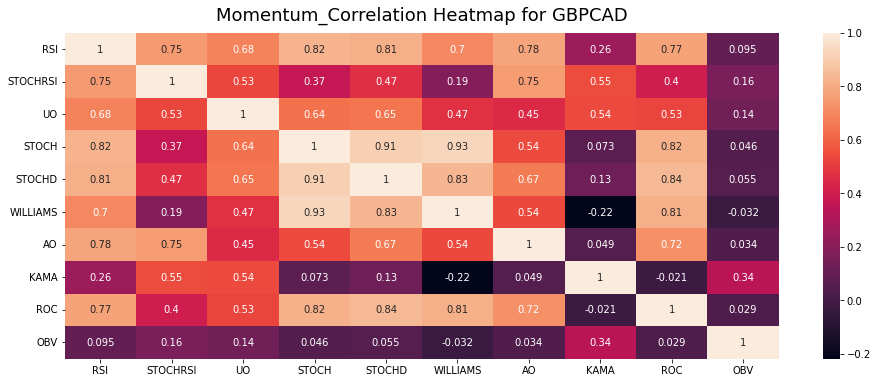

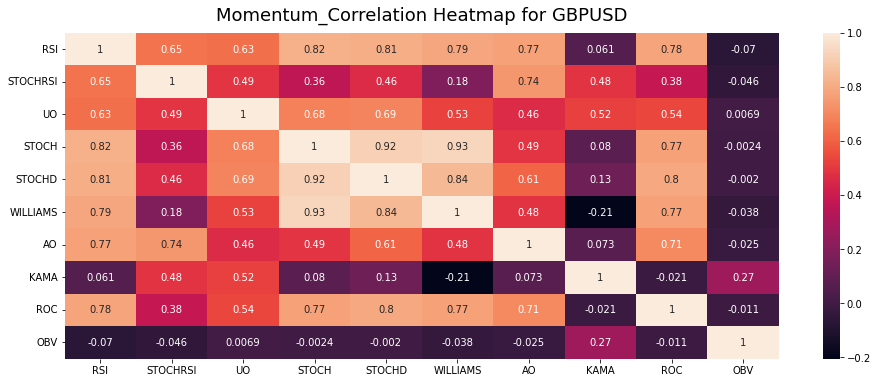

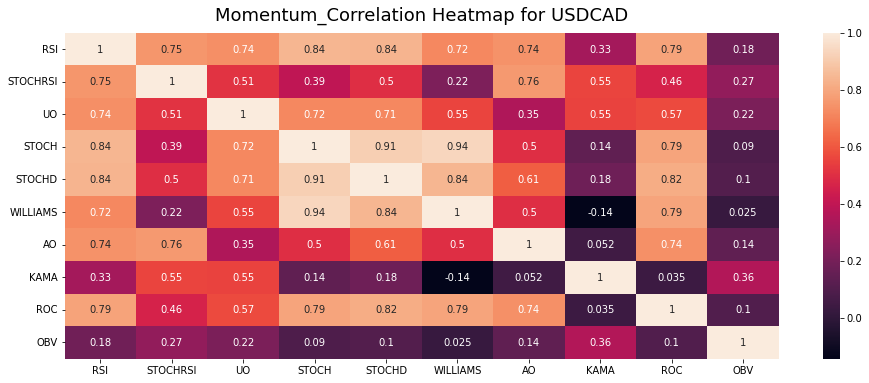

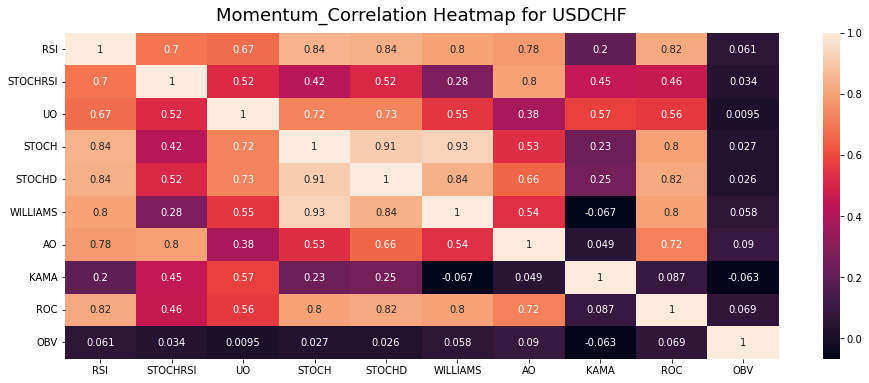

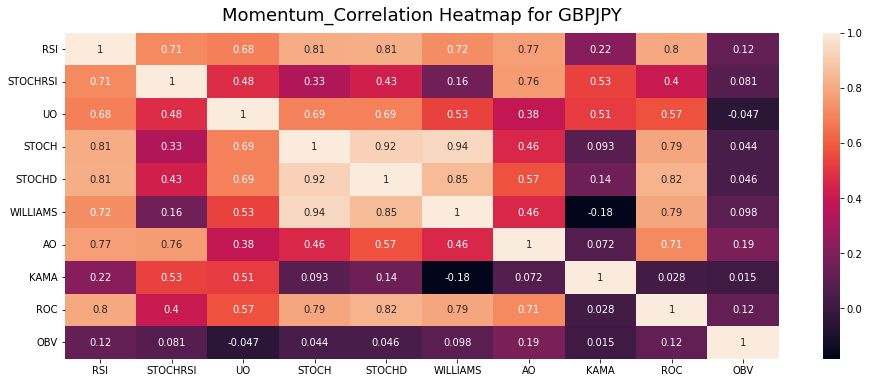

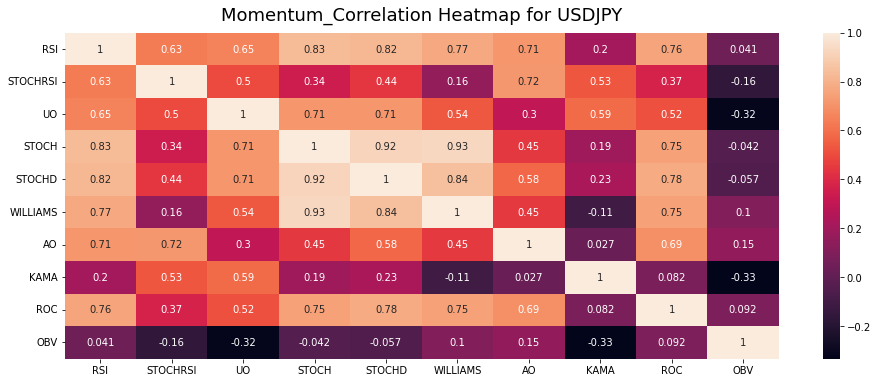

In [21]:
for symbol in range(0,len(selected_symbol)):
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(df[selected_symbol[symbol]][momentum_list].corr() ,annot=True)
    heatmap.set_title('Momentum_Correlation Heatmap for '+selected_symbol[symbol] , fontdict={'fontsize':18}, pad=12);

In [22]:
#sim.save_symbols('2017-2021_4H.pkl')

# คัด feature

In [23]:
# Volume

#volume_list_new = ['MFI','EFI','CFI','EMV','VPT','VWAP','OBV']
volume_list_new = ['EFI']

for symbol in range(0,len(selected_symbol)):
    print('------')
    print('Corr for', selected_symbol[symbol])
    print('------')
    print(df[selected_symbol[symbol]][volume_list_new].corr())
    
# MFI-EFI, MFI-EMV

------
Corr for EURUSD
------
     EFI
EFI  1.0
------
Corr for GBPCAD
------
     EFI
EFI  1.0
------
Corr for GBPUSD
------
     EFI
EFI  1.0
------
Corr for USDCAD
------
     EFI
EFI  1.0
------
Corr for USDCHF
------
     EFI
EFI  1.0
------
Corr for GBPJPY
------
     EFI
EFI  1.0
------
Corr for USDJPY
------
     EFI
EFI  1.0


In [24]:
#trend_list_new = ['SMA','EMA','WMA','ADX','TRIX','MI','CCI','SAR','STC']
trend_list_new = ['ADX']

for symbol in range(0,len(selected_symbol)):
    print('------')
    print('Corr for', selected_symbol[symbol])
    print('------')
    print(df[selected_symbol[symbol]][trend_list_new].corr())
    
# MFI-EFI, MFI-EMV

------
Corr for EURUSD
------
     ADX
ADX  1.0
------
Corr for GBPCAD
------
     ADX
ADX  1.0
------
Corr for GBPUSD
------
     ADX
ADX  1.0
------
Corr for USDCAD
------
     ADX
ADX  1.0
------
Corr for USDCHF
------
     ADX
ADX  1.0
------
Corr for GBPJPY
------
     ADX
ADX  1.0
------
Corr for USDJPY
------
     ADX
ADX  1.0


In [25]:
#momentum_list_new = ['RSI','STOCHRSI','UO','STOCH','STOCHD','WILLIAMS','AO','KAMA','ROC','OBV']
momentum_list_new = ['STOCHRSI']
#momentum_list_new = ['RSI']

for symbol in range(0,len(selected_symbol)):
    print('------')
    print('Corr for', selected_symbol[symbol])
    print('------')
    print(df[selected_symbol[symbol]][momentum_list_new].corr())
    
# MFI-EFI, MFI-EMV

------
Corr for EURUSD
------
          STOCHRSI
STOCHRSI       1.0
------
Corr for GBPCAD
------
          STOCHRSI
STOCHRSI       1.0
------
Corr for GBPUSD
------
          STOCHRSI
STOCHRSI       1.0
------
Corr for USDCAD
------
          STOCHRSI
STOCHRSI       1.0
------
Corr for USDCHF
------
          STOCHRSI
STOCHRSI       1.0
------
Corr for GBPJPY
------
          STOCHRSI
STOCHRSI       1.0
------
Corr for USDJPY
------
          STOCHRSI
STOCHRSI       1.0


In [26]:
volatility_list_new = ['ATR']
indicator_list = volume_list_new + trend_list_new + momentum_list_new + volatility_list_new


for symbol in range(0,len(selected_symbol)):
    print('------')
    print('Corr for', selected_symbol[symbol])
    print('------')
    print(df[selected_symbol[symbol]][indicator_list].corr())

------
Corr for EURUSD
------
               EFI       ADX  STOCHRSI       ATR
EFI       1.000000  0.168638  0.186708 -0.143547
ADX       0.168638  1.000000  0.489354  0.429623
STOCHRSI  0.186708  0.489354  1.000000  0.394781
ATR      -0.143547  0.429623  0.394781  1.000000
------
Corr for GBPCAD
------
               EFI       ADX  STOCHRSI       ATR
EFI       1.000000  0.131493  0.386206  0.178219
ADX       0.131493  1.000000 -0.069599 -0.035057
STOCHRSI  0.386206 -0.069599  1.000000  0.333103
ATR       0.178219 -0.035057  0.333103  1.000000
------
Corr for GBPUSD
------
               EFI       ADX  STOCHRSI       ATR
EFI       1.000000  0.156768  0.246620 -0.063694
ADX       0.156768  1.000000  0.202557  0.153179
STOCHRSI  0.246620  0.202557  1.000000  0.194218
ATR      -0.063694  0.153179  0.194218  1.000000
------
Corr for USDCAD
------
               EFI       ADX  STOCHRSI       ATR
EFI       1.000000  0.103122  0.504570  0.220664
ADX       0.103122  1.000000 -0.056974  0.41918

In [27]:
for symbol in range(0,len(selected_symbol)):
    df[selected_symbol[symbol]] = df[selected_symbol[symbol]][['open', 'close', 'low', 'high', 'volume'] + indicator_list]
    print(df[selected_symbol[symbol]].head())

                              open    close      low     high    volume  \
Time                                                                      
2017-01-02 00:00:00+00:00  1.05100  1.04519  1.04480  1.05275   72920.0   
2017-01-03 00:00:00+00:00  1.04524  1.04044  1.03399  1.04898  139335.0   
2017-01-04 00:00:00+00:00  1.04044  1.04871  1.03895  1.04996  138590.0   
2017-01-05 00:00:00+00:00  1.04871  1.06055  1.04804  1.06149  170836.0   
2017-01-06 00:00:00+00:00  1.06005  1.05235  1.05235  1.06207  146008.0   

                                  EFI  ADX  STOCHRSI  ATR  
Time                                                       
2017-01-02 00:00:00+00:00    0.000000  0.0       0.0  0.0  
2017-01-03 00:00:00+00:00 -661.841250  0.0       0.0  0.0  
2017-01-04 00:00:00+00:00  311.686738  0.0       0.0  0.0  
2017-01-05 00:00:00+00:00  971.840782  0.0       0.0  0.0  
2017-01-06 00:00:00+00:00  298.534457  0.0       0.0  0.0  
                              open    close      low  

In [28]:
df[selected_symbol[0]].shape

(1037, 9)

In [29]:
df

{'EURUSD':                               open    close      low     high    volume  \
 Time                                                                      
 2017-01-02 00:00:00+00:00  1.05100  1.04519  1.04480  1.05275   72920.0   
 2017-01-03 00:00:00+00:00  1.04524  1.04044  1.03399  1.04898  139335.0   
 2017-01-04 00:00:00+00:00  1.04044  1.04871  1.03895  1.04996  138590.0   
 2017-01-05 00:00:00+00:00  1.04871  1.06055  1.04804  1.06149  170836.0   
 2017-01-06 00:00:00+00:00  1.06005  1.05235  1.05235  1.06207  146008.0   
 ...                            ...      ...      ...      ...       ...   
 2020-12-24 00:00:00+00:00  1.21857  1.21808  1.21774  1.22157   47758.0   
 2020-12-28 00:00:00+00:00  1.21696  1.22160  1.21696  1.22506   65208.0   
 2020-12-29 00:00:00+00:00  1.22160  1.22482  1.22070  1.22749   56037.0   
 2020-12-30 00:00:00+00:00  1.22471  1.22961  1.22470  1.23099   66896.0   
 2020-12-31 00:00:00+00:00  1.22963  1.22155  1.22127  1.23093   58559.0   
 


# Change column name to match with observation space

In [30]:
# Change column to lower case
for i in selected_symbol:
    #sim.symbols_data[i] = sim.symbols_data[i].rename({'close':'Close'})
    df[i].rename({'close':'Close', 'open':'Open', 'low':'Low','high':'High','volume':'Volume'}, axis=1, inplace=True)

df

{'EURUSD':                               Open    Close      Low     High    Volume  \
 Time                                                                      
 2017-01-02 00:00:00+00:00  1.05100  1.04519  1.04480  1.05275   72920.0   
 2017-01-03 00:00:00+00:00  1.04524  1.04044  1.03399  1.04898  139335.0   
 2017-01-04 00:00:00+00:00  1.04044  1.04871  1.03895  1.04996  138590.0   
 2017-01-05 00:00:00+00:00  1.04871  1.06055  1.04804  1.06149  170836.0   
 2017-01-06 00:00:00+00:00  1.06005  1.05235  1.05235  1.06207  146008.0   
 ...                            ...      ...      ...      ...       ...   
 2020-12-24 00:00:00+00:00  1.21857  1.21808  1.21774  1.22157   47758.0   
 2020-12-28 00:00:00+00:00  1.21696  1.22160  1.21696  1.22506   65208.0   
 2020-12-29 00:00:00+00:00  1.22160  1.22482  1.22070  1.22749   56037.0   
 2020-12-30 00:00:00+00:00  1.22471  1.22961  1.22470  1.23099   66896.0   
 2020-12-31 00:00:00+00:00  1.22963  1.22155  1.22127  1.23093   58559.0   
 


# Check suitable window size

In [31]:
df['EURUSD'].head(20)

,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR
Time,,,,,,,,,
2017-01-02 00:00:00+00:00,1.05100,1.04519,1.04480,1.05275,72920.0,0.000000,0.000000,0.000000,0.000000
2017-01-03 00:00:00+00:00,1.04524,1.04044,1.03399,1.04898,139335.0,-661.841250,0.000000,0.000000,0.000000
2017-01-04 00:00:00+00:00,1.04044,1.04871,1.03895,1.04996,138590.0,311.686738,0.000000,0.000000,0.000000
2017-01-05 00:00:00+00:00,1.04871,1.06055,1.04804,1.06149,170836.0,971.840782,0.000000,0.000000,0.000000
2017-01-06 00:00:00+00:00,1.06005,1.05235,1.05235,1.06207,146008.0,298.534457,0.000000,0.000000,0.000000
2017-01-09 00:00:00+00:00,1.05292,1.05723,1.05104,1.05826,125800.0,382.379244,0.000000,0.000000,0.000000
2017-01-10 00:00:00+00:00,1.05718,1.05534,1.05506,1.06268,147523.0,225.846206,0.000000,0.000000,0.000000
2017-01-11 00:00:00+00:00,1.05530,1.05818,1.04534,1.06226,180859.0,288.131277,0.000000,0.000000,0.000000
2017-01-12 00:00:00+00:00,1.05818,1.06109,1.05710,1.06844,180739.0,336.073866,0.000000,0.000000,0.000000


In [22]:
# start => window size should start at 15 to prevent 0 data
start = 13
end = 20

for i in selected_symbol:
    print("--------")
    print(i)
    print("--------")
    print(df[i][['ADX','STOCHRSI','ATR']].iloc[start-1:end])

--------
EURUSD
--------
                                  ADX  STOCHRSI       ATR
Time                                                     
2017-01-18 00:00:00+00:00    0.000000  0.000000  0.000000
2017-01-19 00:00:00+00:00  100.000000  0.000000  0.010334
2017-01-20 00:00:00+00:00   50.876194  0.746335  0.010368
2017-01-23 00:00:00+00:00   49.458822  0.806449  0.009839
2017-01-24 00:00:00+00:00   49.496272  0.806545  0.009442
2017-01-25 00:00:00+00:00   46.644795  0.792490  0.008899
2017-01-26 00:00:00+00:00   39.431796  0.790846  0.008977
2017-01-27 00:00:00+00:00   34.307776  0.785201  0.008939
--------
GBPCAD
--------
                                  ADX  STOCHRSI       ATR
Time                                                     
2017-01-18 00:00:00+00:00    0.000000  0.000000  0.000000
2017-01-19 00:00:00+00:00  100.000000  0.000000  0.018488
2017-01-20 00:00:00+00:00  100.000000  0.265345  0.018316
2017-01-23 00:00:00+00:00  100.000000  0.320730  0.018394
2017-01-24 00:00:00+00

# Check min,max,mean

In [23]:
for i in selected_symbol:
    print('symbol :',i)
    display(df[i].describe().loc[['mean','std','min','max']])

symbol : EURUSD


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR
mean,1.142646,1.142830,1.139138,1.146705,80150.075217,17.633224,24.740741,0.615686,0.007479
std,0.045556,0.045578,0.045302,0.045822,38985.398766,147.694630,12.333578,0.132535,0.002335
min,1.040440,1.040440,1.033990,1.048980,10530.000000,-1365.909878,0.000000,0.000000,0.000000
max,1.250730,1.250780,1.244800,1.255540,308719.000000,971.840782,100.000000,0.909163,0.019854


symbol : GBPCAD


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR
mean,1.703056,1.703393,1.696468,1.711042,112200.215667,11.129045,25.135842,0.595748,0.014505
std,0.045429,0.045322,0.045214,0.045581,50575.895095,348.025951,12.706425,0.136705,0.004270
min,1.574600,1.586130,1.573490,1.588680,2.000000,-1824.853103,0.000000,0.000000,0.000000
max,1.834540,1.834540,1.827270,1.841570,355718.000000,1927.774984,100.000000,0.938849,0.042174


symbol : GBPUSD


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR
mean,1.295461,1.295751,1.290256,1.301358,95251.000964,12.023046,24.862704,0.598428,0.010976
std,0.046438,0.046424,0.046610,0.046220,38585.305482,257.915519,11.898109,0.135560,0.003557
min,1.146520,1.146530,1.140980,1.171350,21062.000000,-2487.194683,0.000000,0.000000,0.000000
max,1.433430,1.433590,1.428220,1.437620,358974.000000,1389.170708,100.000000,0.888126,0.035324


symbol : USDCAD


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR
mean,1.315423,1.315434,1.311364,1.319909,70282.909354,-6.506014,24.599264,0.559949,0.008460
std,0.037854,0.037849,0.037414,0.038319,34790.732148,164.647719,11.179953,0.131917,0.003039
min,1.211860,1.211840,1.206110,1.216530,11952.000000,-1272.470903,0.000000,0.000000,0.000000
max,1.450970,1.450970,1.441980,1.466740,250030.000000,1295.408368,100.000000,0.901652,0.027874


symbol : USDCHF


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR
mean,0.973630,0.973651,0.970612,0.976937,61746.341369,-12.010022,23.639512,0.393568,0.006250
std,0.029964,0.030024,0.030111,0.029811,30686.391990,103.543788,10.170337,0.118097,0.001786
min,0.881100,0.881170,0.879380,0.885420,8796.000000,-875.394402,0.000000,0.000000,0.000000
max,1.027520,1.027000,1.020050,1.033480,231791.000000,925.246437,100.000000,0.758043,0.016061


symbol : GBPJPY


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR
mean,141.957857,141.982777,141.31161,142.662797,133602.700096,-4607.182813,25.625135,0.599908,1.341593
std,5.953891,5.943180,5.97007,5.926082,66502.668803,43604.105043,10.398930,0.144451,0.395741
min,125.128000,125.208000,124.03200,127.510000,30306.000000,-296693.878143,0.000000,0.000000,0.000000
max,155.977000,155.977000,155.41800,156.608000,582052.000000,154447.593057,100.000000,0.901195,3.833357


symbol : USDJPY


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR
mean,109.590372,109.586036,109.212535,109.942130,88106.480231,-3085.910650,22.905849,0.435042,0.721413
std,2.770222,2.762421,2.751508,2.783636,51569.638144,21484.742362,9.250718,0.102135,0.292857
min,102.262000,102.262000,101.177000,103.316000,13163.000000,-178315.574362,0.000000,0.000000,0.000000
max,117.720000,117.731000,117.210000,118.602000,427330.000000,204346.261606,100.000000,0.624902,2.497429


# Check Normal/ Gaussian distribution (for EURUSD as other are similar)

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'EFI'}>],
       [<AxesSubplot:title={'center':'ADX'}>,
        <AxesSubplot:title={'center':'STOCHRSI'}>,
        <AxesSubplot:title={'center':'ATR'}>]], dtype=object)

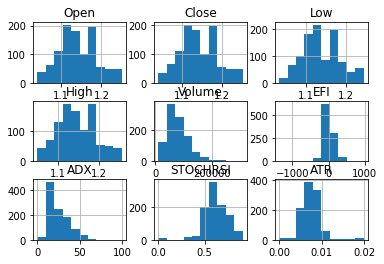

In [24]:
df['EURUSD'].hist()

Your data doesn’t follow Normal/ Gaussian distribution (Prefer this in case of doubt also) so we choose Min-Max scaling. and z-score cannot deal well with non-stationary time series since the mean and standard deviation of the time series vary over time.

z-score not good because it use mean and variance

# Normalize data using MinMax

In [25]:
# Create a copy of open, close

for i in selected_symbol:
    df[i]['open'] = df[i]['Open']
    df[i]['close'] = df[i]['Close']
    df[i]['low'] = df[i]['Low']
    df[i]['high'] = df[i]['High']

df['EURUSD'].head()

,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR,open,close,low,high
Time,,,,,,,,,,,,,
2017-01-02 00:00:00+00:00,1.05100,1.04519,1.04480,1.05275,72920.0,0.000000,0.0,0.0,0.0,1.05100,1.04519,1.04480,1.05275
2017-01-03 00:00:00+00:00,1.04524,1.04044,1.03399,1.04898,139335.0,-661.841250,0.0,0.0,0.0,1.04524,1.04044,1.03399,1.04898
2017-01-04 00:00:00+00:00,1.04044,1.04871,1.03895,1.04996,138590.0,311.686738,0.0,0.0,0.0,1.04044,1.04871,1.03895,1.04996
2017-01-05 00:00:00+00:00,1.04871,1.06055,1.04804,1.06149,170836.0,971.840782,0.0,0.0,0.0,1.04871,1.06055,1.04804,1.06149
2017-01-06 00:00:00+00:00,1.06005,1.05235,1.05235,1.06207,146008.0,298.534457,0.0,0.0,0.0,1.06005,1.05235,1.05235,1.06207


In [26]:
from sklearn.preprocessing import MinMaxScaler
import joblib
import numpy as np

# Volume
#columns = ['Open','Close','Low','High','Volume','EFI','ADX','ATR','STOCHRSI']
columns = ['open','close','low','high','Volume','EFI','ADX','ATR','STOCHRSI']
scaler = MinMaxScaler()


for i in selected_symbol:
    scaler.fit(df[i][columns])
    df[i][columns] = scaler.transform(df[i][columns])
    #scaler.transform(df[i][columns])
    display(df[i])
    scaler_filename = "scaler/scaler_" + i + "_1D"
    joblib.dump(scaler, scaler_filename) 
    print("Save to",scaler_filename)
    
#sim.symbols_data['EURUSD'][columns] = min_max.fit_transform(sim.symbols_data['EURUSD'][columns])

#sim.symbols_data['EURUSD']

,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR,open,close,low,high
Time,,,,,,,,,,,,,
2017-01-02 00:00:00+00:00,1.05100,1.04519,1.04480,1.05275,0.209230,0.584284,0.000000,0.000000,0.000000,0.050216,0.022582,0.051278,0.018251
2017-01-03 00:00:00+00:00,1.04524,1.04044,1.03399,1.04898,0.431958,0.301174,0.000000,0.000000,0.000000,0.022826,0.000000,0.000000,0.000000
2017-01-04 00:00:00+00:00,1.04044,1.04871,1.03895,1.04996,0.429459,0.717611,0.000000,0.000000,0.000000,0.000000,0.039317,0.023528,0.004744
2017-01-05 00:00:00+00:00,1.04871,1.06055,1.04804,1.06149,0.537599,1.000000,0.000000,0.000000,0.000000,0.039327,0.095607,0.066648,0.060564
2017-01-06 00:00:00+00:00,1.06005,1.05235,1.05235,1.06207,0.454336,0.711985,0.000000,0.000000,0.000000,0.093252,0.056623,0.087093,0.063371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 00:00:00+00:00,1.21857,1.21808,1.21774,1.22157,0.124847,0.590264,0.310737,0.902936,0.367404,0.847068,0.844537,0.871638,0.835544
2020-12-28 00:00:00+00:00,1.21696,1.22160,1.21696,1.22506,0.183367,0.603436,0.308543,0.897848,0.364994,0.839412,0.861272,0.867938,0.852440
2020-12-29 00:00:00+00:00,1.22160,1.22482,1.22070,1.22749,0.152611,0.611727,0.309962,0.896069,0.375607,0.861477,0.876581,0.885679,0.864204


Save to scaler/scaler_EURUSD_1D


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR,open,close,low,high
Time,,,,,,,,,,,,,
2017-01-02 00:00:00+00:00,1.65419,1.64897,1.64654,1.65953,0.263488,0.486287,0.000000,0.000000,0.000000,0.306186,0.252969,0.287848,0.280161
2017-01-03 00:00:00+00:00,1.64770,1.64265,1.63879,1.65354,0.499820,0.186851,0.000000,0.000000,0.000000,0.281219,0.227527,0.257309,0.256475
2017-01-04 00:00:00+00:00,1.64222,1.63867,1.63282,1.64975,0.565364,0.233234,0.000000,0.000000,0.000000,0.260137,0.211505,0.233785,0.241488
2017-01-05 00:00:00+00:00,1.63674,1.64153,1.63147,1.64431,0.676672,0.401648,0.000000,0.000000,0.000000,0.239055,0.223018,0.228466,0.219977
2017-01-06 00:00:00+00:00,1.64064,1.62519,1.62297,1.64366,0.556835,0.160199,0.000000,0.000000,0.000000,0.254059,0.157240,0.194972,0.217407
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 00:00:00+00:00,1.73268,1.73819,1.73241,1.74827,0.175339,0.537436,0.156208,0.610679,0.448157,0.608140,0.612133,0.626212,0.631065
2020-12-28 00:00:00+00:00,1.73832,1.72745,1.72564,1.74376,0.202209,0.500720,0.150352,0.620477,0.443483,0.629838,0.568898,0.599535,0.613231
2020-12-29 00:00:00+00:00,1.72784,1.73055,1.72577,1.73284,0.212158,0.507564,0.144914,0.632084,0.432406,0.589521,0.581378,0.600047,0.570050


Save to scaler/scaler_GBPCAD_1D


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR,open,close,low,high
Time,,,,,,,,,,,,,
2017-01-02 00:00:00+00:00,1.23260,1.22736,1.22627,1.23539,0.073697,0.641631,0.000000,0.000000,0.000000,0.300024,0.281579,0.296929,0.240508
2017-01-03 00:00:00+00:00,1.22672,1.22352,1.21988,1.23064,0.316627,0.514778,0.000000,0.000000,0.000000,0.279530,0.268202,0.274683,0.222669
2017-01-04 00:00:00+00:00,1.22295,1.23212,1.22204,1.23524,0.330767,0.741766,0.000000,0.000000,0.000000,0.266390,0.298161,0.282203,0.239944
2017-01-05 00:00:00+00:00,1.23180,1.24140,1.22695,1.24318,0.448966,0.862716,0.000000,0.000000,0.000000,0.297236,0.330488,0.299297,0.269764
2017-01-06 00:00:00+00:00,1.24084,1.22799,1.22606,1.24301,0.343447,0.646849,0.000000,0.000000,0.000000,0.328744,0.283773,0.296198,0.269125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 00:00:00+00:00,1.34908,1.35336,1.34876,1.36193,0.142398,0.677257,0.156840,0.765842,0.485552,0.706005,0.720511,0.723367,0.715740
2020-12-28 00:00:00+00:00,1.35441,1.34511,1.34293,1.35762,0.159240,0.649404,0.147198,0.761253,0.472105,0.724583,0.691772,0.703071,0.699553
2020-12-29 00:00:00+00:00,1.34507,1.35003,1.34392,1.35225,0.195320,0.664079,0.138244,0.760794,0.467939,0.692029,0.708911,0.706517,0.679386


Save to scaler/scaler_GBPUSD_1D


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR,open,close,low,high
Time,,,,,,,,,,,,,
2017-01-02 00:00:00+00:00,1.34205,1.34331,1.33661,1.34522,0.224699,0.495534,0.000000,0.000000,0.000000,0.544477,0.549785,0.553271,0.514328
2017-01-03 00:00:00+00:00,1.34306,1.34257,1.33981,1.34602,0.572325,0.452823,0.000000,0.000000,0.000000,0.548701,0.546690,0.566838,0.517525
2017-01-04 00:00:00+00:00,1.34249,1.32999,1.32813,1.34569,0.658045,0.031021,0.000000,0.000000,0.000000,0.546318,0.494083,0.517319,0.516206
2017-01-05 00:00:00+00:00,1.32993,1.32233,1.31911,1.33126,0.717080,0.000000,0.000000,0.000000,0.000000,0.493789,0.462050,0.479077,0.458535
2017-01-06 00:00:00+00:00,1.32211,1.32346,1.31769,1.32676,0.650745,0.176612,0.000000,0.000000,0.000000,0.461085,0.466775,0.473057,0.440550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 00:00:00+00:00,1.28437,1.28429,1.28128,1.28536,0.143600,0.513057,0.305037,0.440281,0.296971,0.303250,0.302973,0.318693,0.275089
2020-12-28 00:00:00+00:00,1.28430,1.28489,1.28136,1.28758,0.181777,0.512397,0.284602,0.458599,0.297560,0.302957,0.305482,0.319032,0.283961
2020-12-29 00:00:00+00:00,1.28480,1.28166,1.27797,1.28538,0.182948,0.500013,0.268450,0.471545,0.301737,0.305048,0.291975,0.304659,0.275169


Save to scaler/scaler_USDCAD_1D


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR,open,close,low,high
Time,,,,,,,,,,,,,
2017-01-02 00:00:00+00:00,1.01750,1.02233,1.01332,1.02384,0.157178,0.486157,0.000000,0.000000,0.000000,0.931567,0.967976,0.952158,0.934891
2017-01-03 00:00:00+00:00,1.02250,1.02700,1.01923,1.03348,0.549788,0.826935,0.000000,0.000000,0.000000,0.965715,1.000000,0.994171,1.000000
2017-01-04 00:00:00+00:00,1.02752,1.02009,1.02005,1.02905,0.636534,0.331957,0.000000,0.000000,0.000000,1.000000,0.952616,1.000000,0.970080
2017-01-05 00:00:00+00:00,1.02003,1.00958,1.00864,1.02206,0.740052,0.000000,0.000000,0.000000,0.000000,0.948846,0.880546,0.918888,0.922869
2017-01-06 00:00:00+00:00,1.00951,1.01692,1.00888,1.01836,0.579663,0.325594,0.000000,0.000000,0.000000,0.876998,0.930878,0.920594,0.897879
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 00:00:00+00:00,0.88795,0.89135,0.88686,0.89181,0.130815,0.497549,0.272052,0.291224,0.318034,0.046783,0.069807,0.053174,0.043158
2020-12-28 00:00:00+00:00,0.88810,0.88887,0.88762,0.89188,0.210494,0.484956,0.257364,0.304253,0.305226,0.047808,0.052801,0.058577,0.043631
2020-12-29 00:00:00+00:00,0.88909,0.88392,0.88306,0.88922,0.202408,0.463947,0.257063,0.312403,0.318123,0.054569,0.018858,0.026161,0.025665


Save to scaler/scaler_USDCHF_1D


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR,open,close,low,high
Time,,,,,,,,,,,,,
2017-01-02 00:00:00+00:00,143.878,144.222,143.830,144.948,0.133255,0.657652,0.000000,0.000000,0.000000,0.607799,0.617960,0.630791,0.599285
2017-01-03 00:00:00+00:00,144.219,144.079,143.513,145.383,0.306474,0.594446,0.000000,0.000000,0.000000,0.618853,0.613312,0.620691,0.614235
2017-01-04 00:00:00+00:00,144.020,144.415,143.673,144.936,0.337320,0.715272,0.000000,0.000000,0.000000,0.612402,0.624232,0.625789,0.598873
2017-01-05 00:00:00+00:00,144.335,143.166,142.478,144.636,0.448837,0.396142,0.000000,0.000000,0.000000,0.622613,0.583639,0.587714,0.588563
2017-01-06 00:00:00+00:00,143.122,143.643,142.963,144.033,0.364191,0.553211,0.000000,0.000000,0.000000,0.583293,0.599142,0.603167,0.567840
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 00:00:00+00:00,139.721,140.307,139.515,141.209,0.043435,0.682204,0.139108,0.729445,0.393911,0.473046,0.490721,0.493309,0.470788
2020-12-28 00:00:00+00:00,140.193,139.563,139.475,140.571,0.080340,0.661114,0.131358,0.727774,0.375818,0.488346,0.466541,0.492035,0.448862
2020-12-29 00:00:00+00:00,139.531,139.867,139.490,140.167,0.068961,0.667199,0.124162,0.728326,0.370395,0.466887,0.476421,0.492513,0.434978


Save to scaler/scaler_GBPJPY_1D


,Open,Close,Low,High,Volume,EFI,ADX,STOCHRSI,ATR,open,close,low,high
Time,,,,,,,,,,,,,
2017-01-02 00:00:00+00:00,116.780,117.478,116.634,117.651,0.074038,0.465987,0.000000,0.000000,0.000000,0.939190,0.983645,0.964074,0.937786
2017-01-03 00:00:00+00:00,117.461,117.731,117.210,118.602,0.386967,0.580653,0.000000,0.000000,0.000000,0.983245,1.000000,1.000000,1.000000
2017-01-04 00:00:00+00:00,117.720,117.214,117.047,118.182,0.384777,0.393399,0.000000,0.000000,0.000000,1.000000,0.966578,0.989833,0.972524
2017-01-05 00:00:00+00:00,117.215,115.339,115.213,117.425,0.506421,0.000000,0.000000,0.000000,0.000000,0.967331,0.845368,0.875444,0.923001
2017-01-06 00:00:00+00:00,115.328,116.942,115.065,117.175,0.427692,0.392095,0.000000,0.000000,0.000000,0.845258,0.948995,0.866213,0.906647
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 00:00:00+00:00,103.537,103.671,103.487,103.765,0.064913,0.464643,0.168978,0.588208,0.187336,0.082482,0.091085,0.144078,0.029373
2020-12-28 00:00:00+00:00,103.497,103.778,103.403,103.898,0.091917,0.466881,0.163056,0.591111,0.190281,0.079894,0.098002,0.138839,0.038074
2020-12-29 00:00:00+00:00,103.788,103.568,103.463,103.815,0.095672,0.462615,0.157558,0.587286,0.193170,0.098719,0.084427,0.142581,0.032644


Save to scaler/scaler_USDJPY_1D


In [27]:
#Save data
sim.save_symbols(file_name)